### import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1. logistic regression fitting for the student prob

### read in data

In [4]:
students=pd.read_csv("ex2/ex2data1.txt",names=["Exam1","Exam2","Admitted"])

### plot the data

Text(0, 0.5, 'Exam 2 Score')

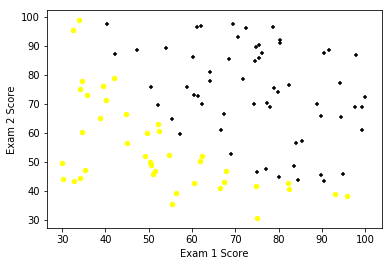

In [11]:
ax=students[students["Admitted"]==0].plot.scatter(x="Exam1",y="Exam2", color="yellow")
students[students["Admitted"]==1].plot.scatter(
    x="Exam1",y="Exam2", color="k",marker="+",ax=ax)
ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")

### build a model

In [22]:
#import packages
from sklearn import linear_model

In [144]:
#create the model
model=linear_model.LogisticRegression(penalty="l2", C=1e10)

#data needs to be an array
#X=np.array(students[["Exam1","Exam2"]]).reshape(-1, 1)
X=students[["Exam1","Exam2"]]
y=students["Admitted"]

#train the model
model.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [145]:
model.penalty ### NOTE THAT THIS IS NOT OPTIONAL WITH THIS LOG REG CODE, either l1 or l2 required

'l2'

In [146]:
#predict per the homework
p=np.array([45,85]).reshape(-1,2)

print(model.predict(p))
print(model.predict_proba(p)) #probability estimate
print(model.score(X,y)) #mean accuracy of the model

[1]
[[0.22541844 0.77458156]]
0.89


Ok, so i get a slightly different result than the homework,
Default log model: a 61% probability that the person gets admitted, given these test scores. PDF says 78%, but it is using GD instead.

Played with the regularization. Made C=1000, now much better, closer to not having reg.

In [147]:
#plot the model, since we know what it will look like in this case
b=model.intercept_
m=model.coef_

#get a range to work with
plot_x=students["Exam1"].max()*np.arange(100)/100.+students["Exam1"].min()
# now convert it to the decision boundary
theta1=b
theta2=m[0][0]
theta3=m[0][1]

pred = (-1./theta3)*(theta2*plot_x + theta1)

In [148]:
print(b,m)

[-24.9560464] [[0.20459008 0.19981009]]


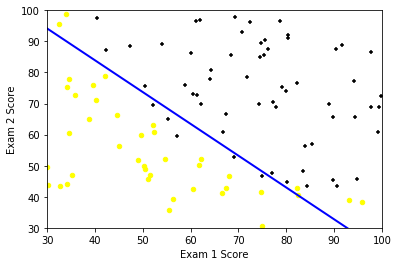

In [149]:
ax=students[students["Admitted"]==0].plot.scatter(x="Exam1",y="Exam2", color="yellow")
students[students["Admitted"]==1].plot.scatter(x="Exam1",y="Exam2", color="k",marker="+",ax=ax)

#plt.scatter(data_foodtruck["Pop"], data_foodtruck["Profit"],  color='black')
ax.plot(plot_x, pred, color='blue', linewidth=2)

ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")

ax.set_xlim([30,100])
ax.set_ylim([30,100])
plt.show()

And now we see why, the decision boundary was definitely not as good with the auto regularization, but turning it effectively off matches the assignment expectations.

# 2. logistic regression for microchip quality assurance

### read in the data

In [107]:
data_chips=pd.read_csv("ex2/ex2data2.txt",names=["Test1","Test2","Accepted"])

### plot the data

Text(0, 0.5, 'Test 2 Score')

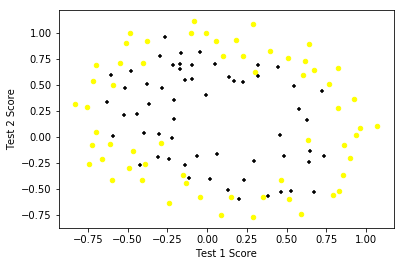

In [108]:
ax=data_chips[data_chips["Accepted"]==0].plot.scatter(x="Test1",y="Test2", color="yellow")
data_chips[data_chips["Accepted"]==1].plot.scatter(x="Test1",y="Test2",
                                                   color="k",marker="+",ax=ax)
ax.set_xlabel("Test 1 Score")
ax.set_ylabel("Test 2 Score")

### feature engineering

In [117]:
#build features for all polynomial terms up to the 6th power

degree = 6
for i in range(degree+1):
    for j in range(i+1):
        feat_name='x1^'+np.str(i-j)+'_x2^'+np.str(j)
        data_chips[feat_name]=data_chips['Test1']**(i-j)*data_chips['Test2']**j

In [120]:
data_chips.describe()

,Test1,Test2,Accepted,x1^0_x2^0,x1^1_x2^0,x1^0_x2^1,x1^2_x2^0,x1^1_x2^1,x1^0_x2^2,x1^3_x2^0,...,x1^2_x2^3,x1^1_x2^4,x1^0_x2^5,x1^6_x2^0,x1^5_x2^1,x1^4_x2^2,x1^3_x2^3,x1^2_x2^4,x1^1_x2^5,x1^0_x2^6
count,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,0.054779,0.183102,0.491525,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.496654,0.519743,0.502060,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,-0.830070,-0.769740,0.000000,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,-0.372120,-0.254385,0.000000,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,-0.006336,0.213455,0.000000,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,0.478970,0.646562,1.000000,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.070900,1.108900,1.000000,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


In [151]:
#import packages
from sklearn.preprocessing import StandardScaler

In [152]:
#data needs to be an array
X=data_chips.drop(columns=["Accepted"])
y=data_chips["Accepted"]

#need to scale, especially with the 6th power in play!!!
scaler=StandardScaler().fit(X)
Xs=scaler.transform(X)

In [153]:
#create the model
model=linear_model.LogisticRegression(penalty="l2", C=1) #C is inverse lambda

#train the model
model.fit(Xs,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [154]:
#alright, what do we have?
b=model.intercept_
m=model.coef_

In [155]:
model.fit_intercept

True

In [156]:
#get a range to work with
plot_x=data_chips["Test1"].max()*np.arange(100)/100.+data_chips["Test1"].min()
# now convert it to the decision boundary
theta1=b
theta2=m[0][0]
theta3=m[0][1]

pred = (-1./theta3)*(theta2*plot_x + theta1)

Text(0, 0.5, 'Test 2 Score')

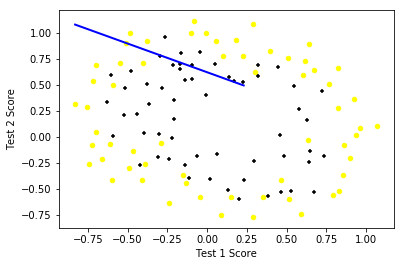

In [157]:
ax=data_chips[data_chips["Accepted"]==0].plot.scatter(x="Test1",y="Test2", color="yellow")
data_chips[data_chips["Accepted"]==1].plot.scatter(x="Test1",y="Test2",
                                                   color="k",marker="+",ax=ax)
ax.plot(plot_x, pred, color='blue', linewidth=2)

ax.set_xlabel("Test 1 Score")
ax.set_ylabel("Test 2 Score")

this is too cumbersome to plot.
did i do a good job? who knows. but that is all the time i want to spend on this.